In [3]:
# pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import tensorflow

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

In [2]:
tensorflow.__version__

'2.6.2'

# Image Augmentation

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
#                                    horizontal_flip = True,
#                                   vertical_flip=False,
                                  rotation_range=0.3,
                                    width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest'
                                  )

In [4]:
training_set = train_datagen.flow_from_directory("data/intelImageClassification/seg_train/seg_train",
                                                 target_size=(28,28),
                                                 batch_size=32,
                                                 class_mode="categorical")

Found 14035 images belonging to 6 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1/255)
test_data = test_datagen.flow_from_directory("data/intelImageClassification/seg_test/seg_test",
                                             target_size=(28,28),
                                             batch_size=32,
                                             class_mode="categorical")

Found 3000 images belonging to 6 classes.


# Model Building

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D ,Dense,MaxPooling2D,Flatten, BatchNormalization,Dropout,Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping

In [7]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [8]:
# encoder = Sequential()
# encoder.add(Flatten(input_shape=[28,28,3]))
# encoder.add(Dense(2000,activation="relu"))
# encoder.add(Dense(1000,activation="relu"))
# encoder.add(Dense(500,activation="relu"))
# encoder.add(Dense(250,activation="relu"))
# # encoder.add(Dense(2000,activation="relu"))
# # encoder.add(Dense(1000,activation="relu"))
# # encoder.add(Dense(500,activation="relu"))
# decoder = Sequential()
# decoder.add(Dense(500,input_shape=[250],activation='relu'))
# # decoder.add(Dense(1250,activation='relu'))
# # decoder.add(Dense(2500,activation='relu'))
# # decoder.add(Dense(5000,activation='relu'))
# decoder.add(Dense(1000,activation='relu'))
# decoder.add(Dense(2000,activation='relu'))
# decoder.add(Dense(28 * 28*3, activation="sigmoid"))
# decoder.add(Reshape([28, 28,3]))

In [9]:
# encoder = Sequential()
# encoder.add(Flatten(input_shape=[150,150,3]))
# encoder.add(Dense(30000,activation="relu"))
# encoder.add(Dense(15000,activation="relu"))
# encoder.add(Dense(7000,activation="relu"))
# encoder.add(Dense(4000,activation="relu"))
# encoder.add(Dense(2000,activation="relu"))
# encoder.add(Dense(1000,activation="relu"))
# # encoder.add(Dense(500,activation="relu"))
# decoder = Sequential()
# decoder.add(Dense(2000,input_shape=[1000],activation='relu'))
# # decoder.add(Dense(1250,activation='relu'))
# # decoder.add(Dense(2500,activation='relu'))
# # decoder.add(Dense(5000,activation='relu'))
# # decoder.add(Dense(1000,activation='relu'))
# decoder.add(Dense(2352,activation='relu'))
# decoder.add(Dense(28 * 28*3, activation="sigmoid"))
# decoder.add(Reshape([28, 28,3]))

In [10]:
# cnn = Sequential([encoder, decoder])
cnn = Sequential()
# cnn.add()
cnn.add(Conv2D(filters = 128,kernel_size = 3,activation="relu",input_shape=[28,28,3]))
cnn.add(MaxPooling2D(pool_size=2,strides=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))
cnn.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(MaxPooling2D(pool_size=2,strides=2))
# cnn.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
# cnn.add(MaxPooling2D(pool_size=2,strides=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))
cnn.add(Dense(units=256,activation="relu"))
cnn.add(Dense(units=6,activation="softmax"))

In [11]:
# from tensorflow.keras.optimizers import Adam
# opt = Adam(learning_rate=0.00003)
cnn.compile(optimizer = "Adam", loss = categorical_crossentropy, metrics = ['accuracy'])

In [12]:
callbacks = EarlyStopping(monitor = 'val_loss', patience = 3)

In [13]:
history = cnn.fit(x=training_set,validation_data=test_data,epochs=25,callbacks =[callbacks])

Epoch 1/25
439/439 [==============================] - 21s 46ms/step - loss: 1.3880 - accuracy: 0.5197 - val_loss: 1.2276 - val_accuracy: 0.5257
Epoch 2/25
439/439 [==============================] - 20s 46ms/step - loss: 1.0349 - accuracy: 0.6130 - val_loss: 1.0599 - val_accuracy: 0.6077
Epoch 3/25
439/439 [==============================] - 20s 47ms/step - loss: 0.9447 - accuracy: 0.6445 - val_loss: 0.8349 - val_accuracy: 0.6847
Epoch 4/25
439/439 [==============================] - 20s 46ms/step - loss: 0.8841 - accuracy: 0.6633 - val_loss: 1.0716 - val_accuracy: 0.6217
Epoch 5/25
439/439 [==============================] - 20s 46ms/step - loss: 0.8517 - accuracy: 0.6751 - val_loss: 0.7457 - val_accuracy: 0.7223
Epoch 6/25
439/439 [==============================] - 20s 46ms/step - loss: 0.8343 - accuracy: 0.6853 - val_loss: 0.8800 - val_accuracy: 0.6800
Epoch 7/25
439/439 [==============================] - 20s 46ms/step - loss: 0.8043 - accuracy: 0.6963 - val_loss: 0.8241 - val_accuracy:

In [14]:
historyz = pd.DataFrame(cnn.history.history)

In [15]:
historyz.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [16]:
historyAcc = historyz[['accuracy','val_accuracy']]

<AxesSubplot:>

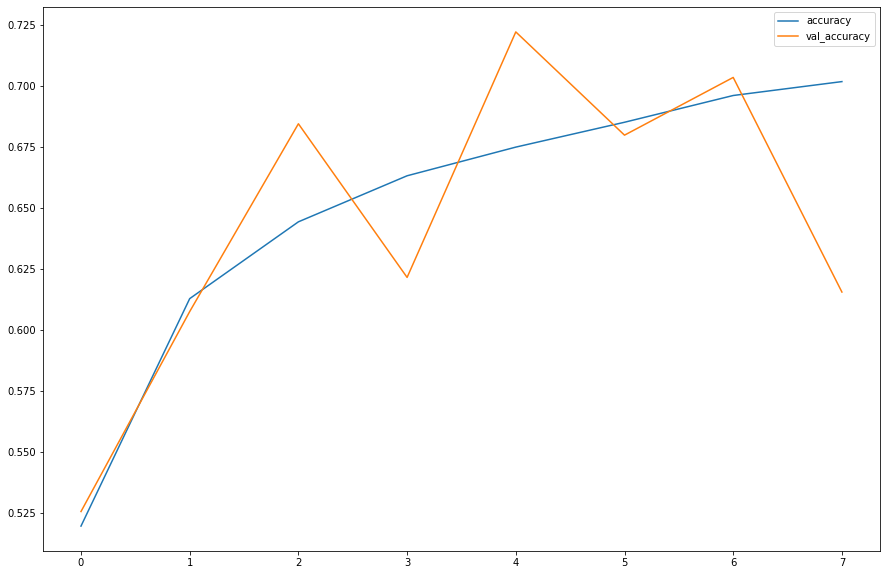

In [17]:
# plt.figure(figsize=(30,9))
historyAcc.plot(figsize=(15, 10))

# ResNetV2 [Input size = (75,75)]

In [24]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

In [25]:
training_set = train_datagen.flow_from_directory("data/intelImageClassification/seg_train/seg_train",
                                                 target_size=(75,75),
                                                 batch_size=32,
                                                 class_mode="categorical")

Found 14035 images belonging to 6 classes.


In [26]:
test_datagen = ImageDataGenerator(rescale=1/255)
test_data = test_datagen.flow_from_directory("data/intelImageClassification/seg_test/seg_test",
                                             target_size=(75,75),
                                             batch_size=32,
                                             class_mode="categorical")

Found 3000 images belonging to 6 classes.


In [27]:
model_Incep = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=[75, 75, 3])

In [28]:
model = Sequential()
model.add(model_Incep)
model.add(Flatten())
model.add(Dense(16,activation = 'relu'))
# model.add(Dropout(0.4))
model.add(Dense(6, activation='softmax'))

In [29]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.00003)

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy']
              )

In [31]:
model.fit(training_set,validation_data=test_data, epochs=10,batch_size=128)

Epoch 1/10
439/439 [==============================] - 172s 360ms/step - loss: 1.1232 - accuracy: 0.6002 - val_loss: 99.5605 - val_accuracy: 0.7603
Epoch 2/10
439/439 [==============================] - 156s 355ms/step - loss: 0.6421 - accuracy: 0.7753 - val_loss: 398.4696 - val_accuracy: 0.8303
Epoch 3/10
439/439 [==============================] - 156s 354ms/step - loss: 0.5109 - accuracy: 0.8214 - val_loss: 617.4578 - val_accuracy: 0.8533
Epoch 4/10
439/439 [==============================] - 156s 354ms/step - loss: 0.4494 - accuracy: 0.8416 - val_loss: 791.0849 - val_accuracy: 0.8560
Epoch 5/10
439/439 [==============================] - 156s 354ms/step - loss: 0.3963 - accuracy: 0.8591 - val_loss: 2235.0244 - val_accuracy: 0.8643
Epoch 6/10
439/439 [==============================] - 156s 355ms/step - loss: 0.3583 - accuracy: 0.8745 - val_loss: 3753.4866 - val_accuracy: 0.8743
Epoch 7/10
439/439 [==============================] - 156s 355ms/step - loss: 0.3417 - accuracy: 0.8789 - val_l

<AxesSubplot:>

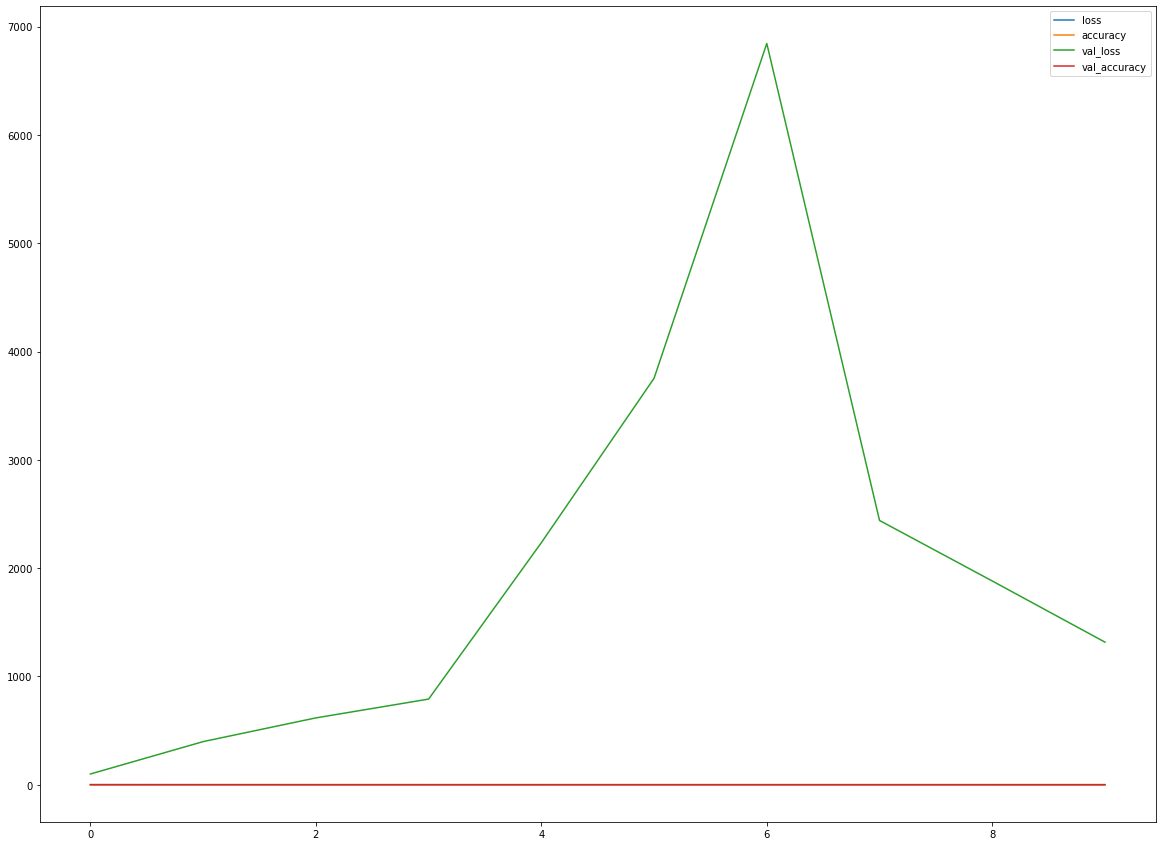

In [32]:
pd.DataFrame(model.history.history).plot(figsize=(20,15))

In [26]:
# model.save("model.h5")

In [114]:
new_img = image.load_img("data/intelImageClassification/seg_pred/seg_pred/10004.jpg", target_size=(75,75,3))
img = image.img_to_array(new_img)
img = img/255
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
probabilty = prediction.flatten()
max_prob = probabilty.max()
index=prediction.argmax(axis=-1)[0]
prediction = list(training_set.class_indices.keys())[index]
print(prediction)

forest


## ResNetV2 [Input size = (150,150)]

In [102]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

In [103]:
training_set = train_datagen.flow_from_directory("data/intelImageClassification/seg_train/seg_train",
                                                 target_size=(150,150),
                                                 batch_size=32,
                                                 class_mode="categorical")

Found 14035 images belonging to 6 classes.


In [104]:
test_datagen = ImageDataGenerator(rescale=1/255)
test_data = test_datagen.flow_from_directory("data/intelImageClassification/seg_test/seg_test",
                                             target_size=(150,150),
                                             batch_size=32,
                                             class_mode="categorical")

Found 3000 images belonging to 6 classes.


In [105]:
model_Incep = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=[150, 150, 3])

In [106]:
model_N = Sequential()
model_N.add(model_Incep)
model_N.add(Flatten())
model_N.add(Dense(16,activation = 'relu'))
# model.add(Dropout(0.4))
model_N.add(Dense(6, activation='softmax'))

In [107]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.00003)

In [108]:
model_N.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy']
              )

In [109]:
model_N.fit(training_set,validation_data=test_data, epochs=10,batch_size=128)

Epoch 1/10
439/439 [==============================] - 395s 868ms/step - loss: 0.6388 - accuracy: 0.7637 - val_loss: 0.3104 - val_accuracy: 0.8983
Epoch 2/10
439/439 [==============================] - 378s 860ms/step - loss: 0.3206 - accuracy: 0.8874 - val_loss: 0.2865 - val_accuracy: 0.9170
Epoch 3/10
439/439 [==============================] - 377s 859ms/step - loss: 0.2468 - accuracy: 0.9097 - val_loss: 0.2761 - val_accuracy: 0.9160
Epoch 4/10
439/439 [==============================] - 376s 857ms/step - loss: 0.2026 - accuracy: 0.9257 - val_loss: 0.3045 - val_accuracy: 0.9207
Epoch 5/10
439/439 [==============================] - 377s 859ms/step - loss: 0.1790 - accuracy: 0.9377 - val_loss: 0.2096 - val_accuracy: 0.9277
Epoch 6/10
439/439 [==============================] - 378s 861ms/step - loss: 0.1474 - accuracy: 0.9471 - val_loss: 0.2078 - val_accuracy: 0.9350
Epoch 7/10
439/439 [==============================] - 375s 854ms/step - loss: 0.1258 - accuracy: 0.9552 - val_loss: 0.4517 -

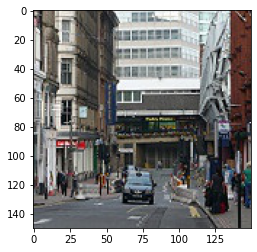

street


In [140]:
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imagePath = 'data/intelImageClassification/seg_pred/seg_pred/10012.jpg'
img = mpimg.imread(imagePath)
imgplot = plt.imshow(img)
plt.show()
new_img = image.load_img(imagePath, target_size=(150,150,3))
img = image.img_to_array(new_img)

img = img/255
img = np.expand_dims(img, axis=0)
prediction = model_N.predict(img)
probabilty = prediction.flatten()
max_prob = probabilty.max()
index=prediction.argmax(axis=-1)[0]
prediction = list(training_set.class_indices.keys())[index]
print(prediction)

In [144]:
model_N.predict(test_data)

array([[9.9996972e-01, 5.1276299e-08, 3.3581769e-06, 2.4513000e-07,
        8.0355017e-07, 2.5848922e-05],
       [1.0601708e-05, 2.4986541e-04, 1.2336497e-04, 9.9960905e-01,
        4.9480786e-07, 6.6761295e-06],
       [1.7596682e-09, 9.9999774e-01, 1.5204805e-07, 3.7212782e-08,
        8.8855945e-10, 2.1539677e-06],
       ...,
       [9.9847132e-01, 2.6012531e-06, 1.0527588e-06, 9.3028518e-07,
        5.1989723e-06, 1.5188055e-03],
       [2.5708658e-05, 5.8268259e-05, 1.6103957e-02, 9.6806920e-01,
        1.5715059e-02, 2.7788305e-05],
       [5.5590817e-08, 7.2156172e-06, 9.9993336e-01, 5.3145977e-05,
        5.6435515e-06, 6.3273978e-07]], dtype=float32)

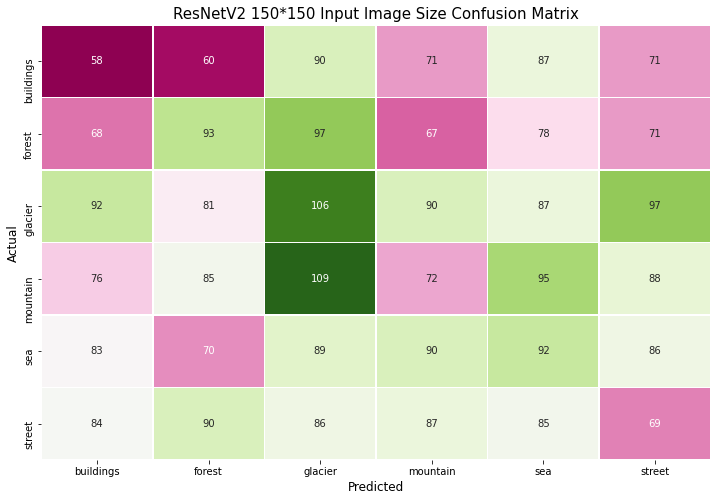

In [180]:
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Y_pred = model_N.predict(test_data)
y_pred = np.argmax(Y_pred, axis = 1)

confusion_matrix_N = confusion_matrix(test_data.classes, y_pred)
conf_matrix = pd.DataFrame(data = confusion_matrix_N, columns = list(training_set.class_indices.keys()), index = list(training_set.class_indices.keys()))

plt.figure(figsize = (12, 8))
sns.heatmap(conf_matrix, annot = True, cbar = False, fmt = 'd', linewidth = 0.5,cmap="PiYG")
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('ResNetV2 150*150 Input Image Size Confusion Matrix', fontsize = 15)
plt.show()

In [161]:
conf_matrix

,buildings,forest,glacier,mountain,sea,street
buildings,69,83,79,83,68,55
forest,76,76,91,76,80,75
glacier,85,78,96,84,107,103
mountain,83,88,105,80,86,83
sea,73,81,109,73,98,76
street,75,73,97,81,85,90


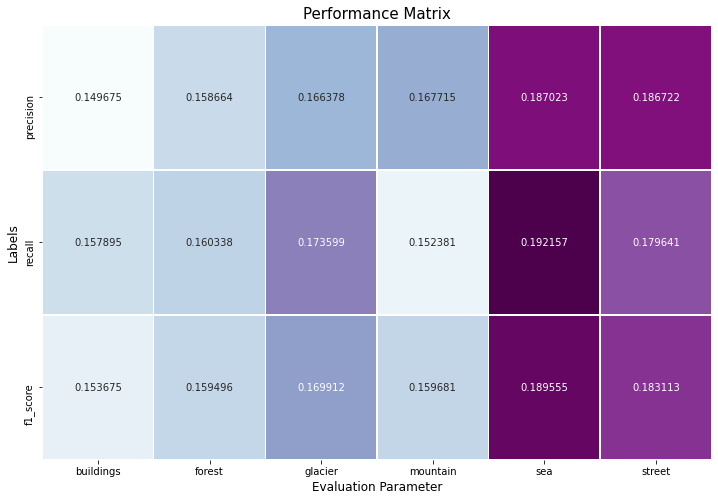

In [179]:
import sklearn
PRFS = sklearn.metrics.precision_recall_fscore_support(test_data.classes, y_pred)
Matrix = pd.DataFrame(data = PRFS, columns = list(training_set.class_indices.keys()), index =  ["precision","recall","f1_score","support"])# In[ ]:
plt.figure(figsize = (12, 8))
Matrix.drop("support",inplace=True)
sns.heatmap(Matrix, annot = True, cbar = False, fmt = 'f', linewidth = 0.5,cmap="BuPu")
plt.xlabel('Evaluation Parameter', fontsize = 12)
plt.ylabel('Labels', fontsize = 12)
plt.title('Performance Matrix', fontsize = 15)
plt.show()

In [181]:
Matrix

,buildings,forest,glacier,mountain,sea,street
precision,0.149675,0.158664,0.166378,0.167715,0.187023,0.186722
recall,0.157895,0.160338,0.173599,0.152381,0.192157,0.179641
f1_score,0.153675,0.159496,0.169912,0.159681,0.189555,0.183113
